In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




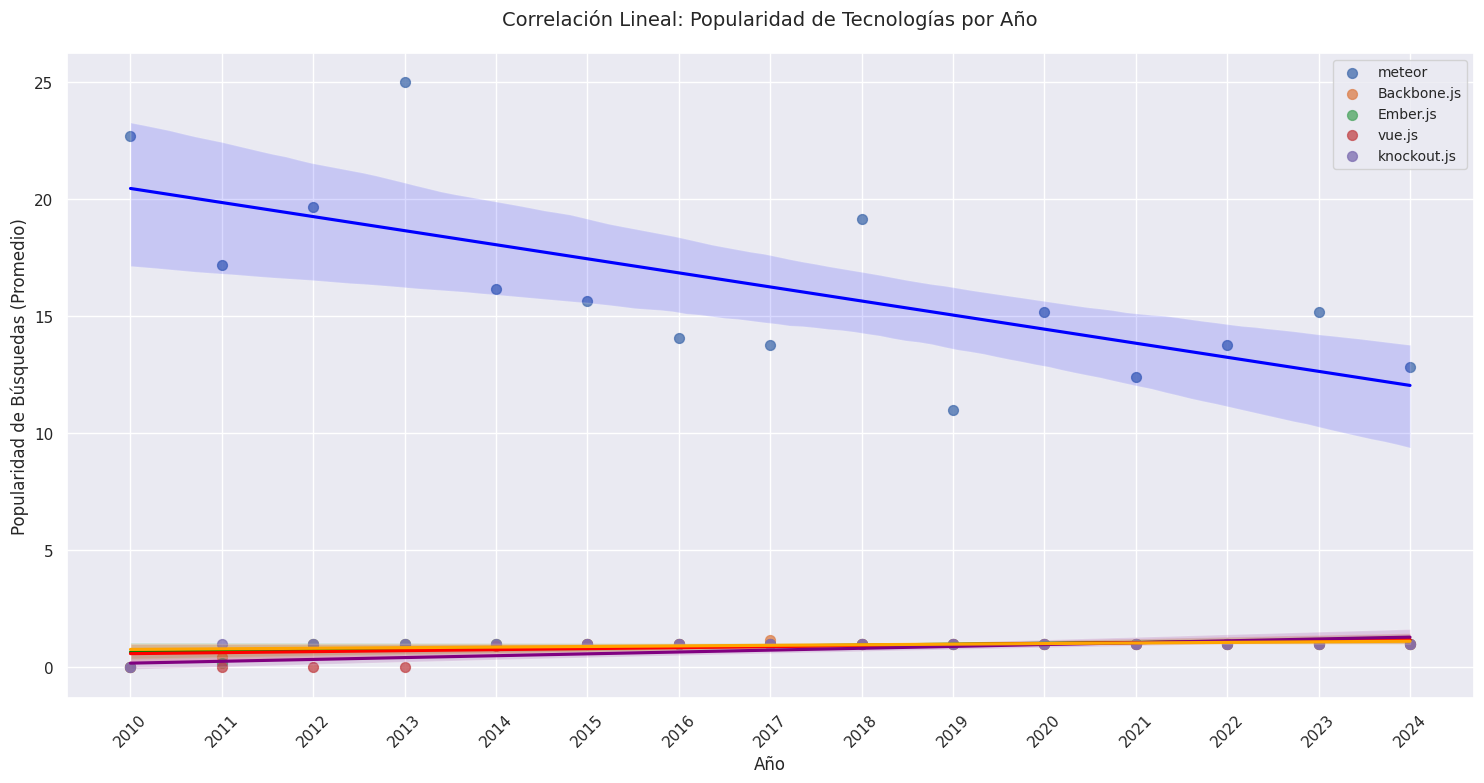

In [11]:

# Configurar el estilo de Seaborn
sns.set_theme(style="darkgrid")

# Cargar el archivo Exce
file_path = '/content/graficos/multiTimeline-_4__1.xlsx'
data_excel = pd.read_excel(file_path)

# Verificar si existe la columna 'Semana' o 'Mes' y convertir a datetime
if 'Semana' in data_excel.columns:
    data_excel['Semana'] = pd.to_datetime(data_excel['Semana'], format='%Y-%m-%d')
    data_excel['Año'] = data_excel['Semana'].dt.year
elif 'Mes' in data_excel.columns:
    data_excel['Mes'] = pd.to_datetime(data_excel['Mes'], format='%Y-%m')
    data_excel['Año'] = data_excel['Mes'].dt.year
else:
    raise KeyError("No se encontró una columna de tiempo ('Semana' o 'Mes') en los datos. Verifique el archivo Excel.")

# Agrupar los datos por año y calcular la media para cada tecnología
data_excel_grouped = data_excel.groupby('Año').mean().reset_index()

# Crear el gráfico de correlación lineal
plt.figure(figsize=(15, 8))

# Iterar dinámicamente sobre las columnas relevantes (omitir columnas de tiempo y agrupación)
columns_to_plot = [col for col in data_excel.columns if col not in ['Semana', 'Mes', 'Año']]

# Asignar colores para cada columna
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, col in enumerate(columns_to_plot):
    sns.regplot(
        x=data_excel_grouped['Año'],
        y=data_excel_grouped[col],
        label=col.split(':')[0],  # Extraer el nombre antes del primer ':' para la etiqueta
        scatter_kws={'s': 50},
        line_kws={'color': colors[i % len(colors)]},
    )

# Configuración del gráfico
plt.title('Correlación Lineal: Popularidad de Tecnologías por Año', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(data_excel_grouped['Año'], rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
